In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Task 01

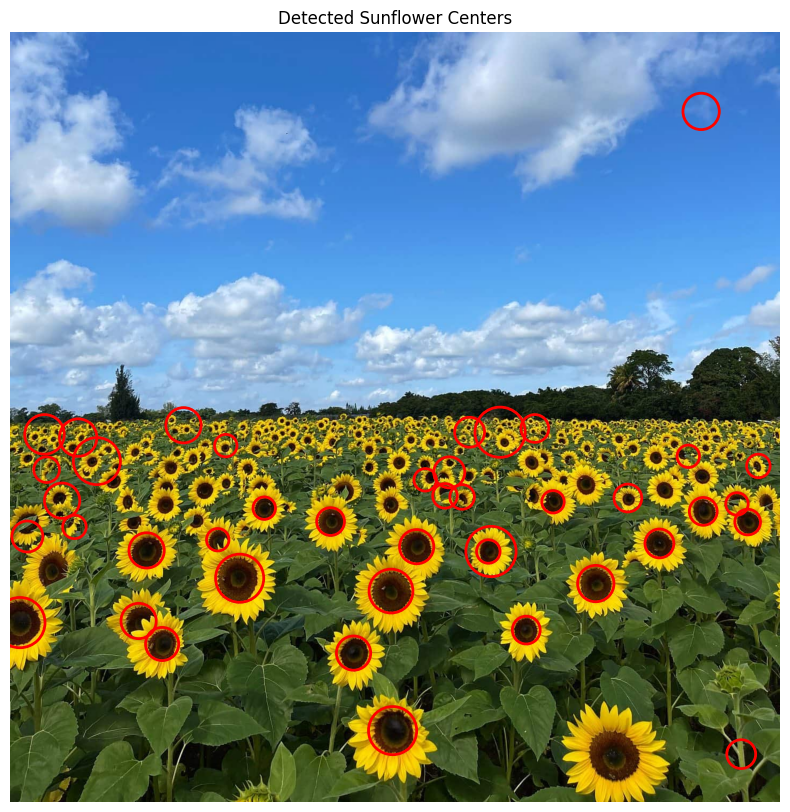

Detected circles (x, y, radius):
Center: (18, 1104), Radius: 47
Center: (1379, 916), Radius: 24
Center: (1296, 896), Radius: 26
Center: (1359, 882), Radius: 21
Center: (1268, 793), Radius: 21
Center: (1367, 1350), Radius: 27
Center: (715, 1306), Radius: 45
Center: (642, 1161), Radius: 32
Center: (965, 1118), Radius: 26
Center: (284, 1144), Radius: 31
Center: (240, 1101), Radius: 33
Center: (1095, 1031), Radius: 34
Center: (32, 943), Radius: 29
Center: (899, 971), Radius: 47
Center: (894, 971), Radius: 22
Center: (1214, 956), Radius: 27
Center: (120, 925), Radius: 22
Center: (712, 1045), Radius: 41
Center: (760, 962), Radius: 32
Center: (845, 869), Radius: 23
Center: (1155, 871), Radius: 26
Center: (813, 867), Radius: 23
Center: (97, 876), Radius: 33
Center: (599, 915), Radius: 26
Center: (776, 837), Radius: 21
Center: (429, 1021), Radius: 45
Center: (388, 949), Radius: 21
Center: (475, 890), Radius: 21
Center: (68, 818), Radius: 24
Center: (821, 823), Radius: 29
Center: (1399, 811), Ra

In [40]:
# Load the image
image_path = 'images/the_berry_farms_sunflower_field.jpeg'  # Update the path if needed
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Check if the image is loaded successfully
if image is None:
    print("Error: Image not found or path is incorrect.")
else:
    # Convert to grayscale for processing
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 1: Apply Gaussian Blur to reduce noise and improve blob detection
    blurred = cv2.GaussianBlur(gray, (15, 15), 0)

    # Step 2: Enhance contrast with Histogram Equalization
    equalized = cv2.equalizeHist(blurred)

    # Step 3: Apply Otsu's thresholding to create a binary mask
    _, binary = cv2.threshold(equalized, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Step 4: Find contours (potential circles)
    contours, _ = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Step 5: Draw detected contours
    output_image = image.copy()
    largest_circles = []

    for contour in contours:
        # Fit a minimum enclosing circle to each contour
        (x, y), radius = cv2.minEnclosingCircle(contour)
        center = (int(x), int(y))
        radius = int(radius)

        # Filter based on size to ignore small or excessively large areas
        if 20 < radius < 50:  # Adjust this range based on your image's sunflower size
            # Store the largest circles
            largest_circles.append((center, radius))
            cv2.circle(output_image, center, radius, (0, 255, 0), 2)

    # Convert BGR image to RGB for displaying with matplotlib
    output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

    # Step 6: Display the results using matplotlib
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.imshow(output_image_rgb)
    ax.set_title('Detected Sunflower Centers')
    ax.axis('off')

    # Draw each detected blob as a circle
    for center, radius in largest_circles:
        circle = Circle(center, radius, color='red', linewidth=2, fill=False)
        ax.add_patch(circle)

    plt.show()

    # Report parameters of the largest circles
    print("Detected circles (x, y, radius):")
    for center, radius in largest_circles:
        print(f"Center: {center}, Radius: {radius}")


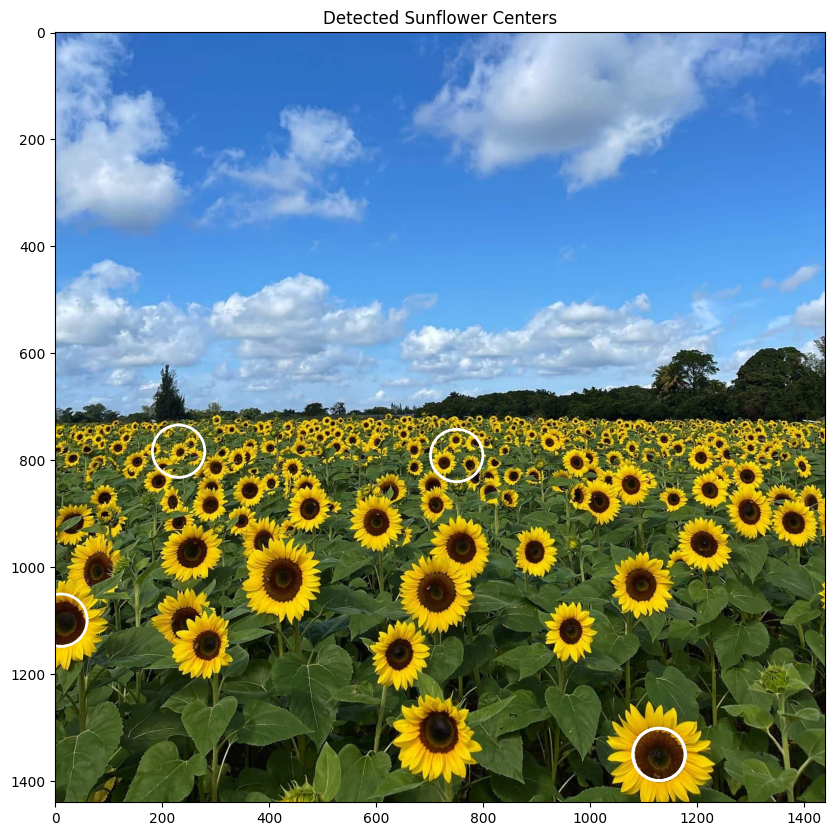

Detected circles (x, y, radius):
Center: (231, 783), Radius: 49
Center: (1129, 1350), Radius: 49
Center: (1130, 1350), Radius: 49
Center: (751, 791), Radius: 49
Center: (11, 1099), Radius: 49
Range of sigma values used: [ 1.          2.52631579  4.05263158  5.57894737  7.10526316  8.63157895
 10.15789474 11.68421053 13.21052632 14.73684211 16.26315789 17.78947368
 19.31578947 20.84210526 22.36842105 23.89473684 25.42105263 26.94736842
 28.47368421 30.        ]


In [41]:
# Load the image
image_path = 'images/the_berry_farms_sunflower_field.jpeg'  # Update path if needed
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Check if image is loaded
if image is None:
    print("Error: Image not found or path is incorrect.")
else:
    # Convert to grayscale for processing
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Define the range of sigma values
    sigma_values = np.linspace(1, 30, 20)

    # Initialize list to store largest circles
    largest_circles = []

    for sigma in sigma_values:
        # Step 1: Apply Gaussian Blur to reduce noise and improve blob detection
        blurred = cv2.GaussianBlur(gray, (0, 0), sigma)

        # Step 2: Enhance contrast with Histogram Equalization
        equalized = cv2.equalizeHist(blurred)

        # Step 3: Apply Otsu's thresholding to create a binary mask
        _, binary = cv2.threshold(equalized, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

        # Step 4: Find contours (potential circles)
        contours, _ = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        # Step 5: Draw detected contours
        output_image = image.copy()

        for contour in contours:
            # Fit a minimum enclosing circle to each contour
            (x, y), radius = cv2.minEnclosingCircle(contour)
            center = (int(x), int(y))
            radius = int(radius)

            # Filter based on size to ignore small or excessively large areas
            if 20 < radius < 50:  # Adjust this range based on your image's sunflower size
                # Store the largest circles
                largest_circles.append((center, radius))
                #cv2.circle(output_image, center, radius, (0, 255, 0), 2)

    # Sort the circles by radius in descending order
    largest_circles = sorted(largest_circles, key=lambda x: x[1], reverse=True)

    # Convert BGR image to RGB for displaying with matplotlib
    output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

    # Step 6: Display the results using matplotlib
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.imshow(output_image_rgb)
    ax.set_title('Detected Sunflower Centers')
    ax.axis('on') 

    # Draw only the largest circles
    for center, radius in largest_circles[:5]:  # Display the 10 largest circles
        circle = Circle(center, radius, color='white', linewidth=2, fill=False)
        ax.add_patch(circle)

    plt.show()

    # Report parameters of the largest circles
    print("Detected circles (x, y, radius):")
    for center, radius in largest_circles[:5]:  # Report the 10 largest circles
        print(f"Center: {center}, Radius: {radius}")

    # Report the range of sigma values used
    print(f"Range of sigma values used: {sigma_values}")

# Task 02

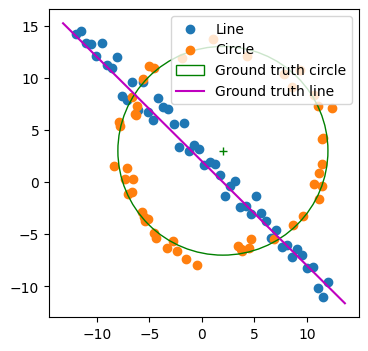

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Number of points
N = 100
half_n = N // 2
r = 10  # Circle radius

# Ground truth center of the circle
x0_gt, y0_gt = 2, 3

# Noise scale
s = r / 16

# Generate random angles and noise for the circle
t = np.random.uniform(0, 2 * np.pi, half_n)
n = s * np.random.randn(half_n)

# Generate circle points with noise
x, y = x0_gt + (r + n) * np.cos(t), y0_gt + (r + n) * np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

# Line parameters and noise
s = 1.0
m, b = -1, 2  # Slope and intercept of the line
x = np.linspace(-12, 12, half_n)
y = m * x + b + s * np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

# Combine circle and line points
X = np.vstack((X_circ, X_line))

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

# Plot line and circle points
ax.scatter(X_line[:, 0], X_line[:, 1], label='Line')
ax.scatter(X_circ[:, 0], X_circ[:, 1], label='Circle')

# Plot ground truth circle
circle_gt = plt.Circle((x0_gt, y0_gt), r, color='g', fill=False, label='Ground truth circle')
ax.add_patch(circle_gt)

# Plot the center of the circle
ax.plot((x0_gt), (y0_gt), '+', color='g')

# Plot the ground truth line
x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = m * x_ + b
plt.plot(x_, y_, color='m', label='Ground truth line')

# Show legend and plot
plt.legend()
plt.show()


## (a)

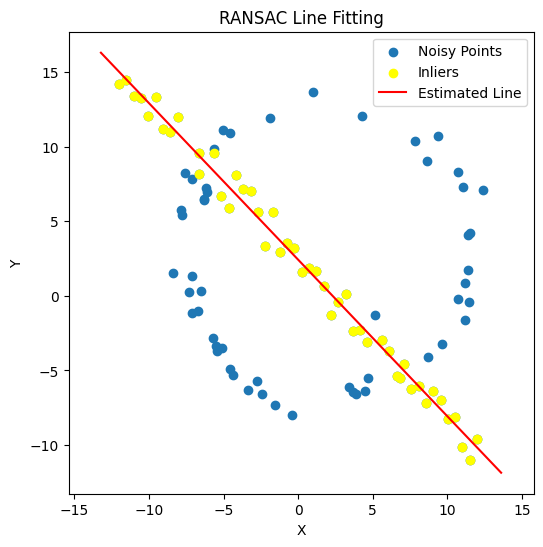

In [7]:

# Function to compute the distance from a point to a line
def point_to_line_distance(point, line_params):
    a, b, d = line_params
    x, y = point
    return np.abs(a * x + b * y + d) / np.sqrt(a**2 + b**2)

# Function to fit a line to two points
def fit_line(points):
    (x1, y1), (x2, y2) = points
    a = y2 - y1
    b = x1 - x2
    norm = np.sqrt(a**2 + b**2)
    a, b = a / norm, b / norm
    d = -(a * x1 + b * y1)
    return a, b, d

# RANSAC algorithm for line fitting
def ransac_line_fitting(X, num_iterations=1000, distance_threshold=1.0, consensus_threshold=50):
    best_inliers = []
    best_line_params = None

    for _ in range(num_iterations):
        # Randomly select two points
        sample_indices = np.random.choice(X.shape[0], 2, replace=False)
        sample_points = X[sample_indices]

        # Fit a line to the sample points
        line_params = fit_line(sample_points)

        # Compute the number of inliers
        distances = np.array([point_to_line_distance(point, line_params) for point in X])
        inliers = distances < distance_threshold

        if np.sum(inliers) > np.sum(best_inliers):
            best_inliers = inliers
            best_line_params = line_params

        # Check if the number of inliers meets the consensus threshold
        if np.sum(inliers) > consensus_threshold:
            break

    return best_line_params, best_inliers



# Apply RANSAC to estimate the line
line_params, inliers = ransac_line_fitting(X, num_iterations=1000, distance_threshold=1.0, consensus_threshold=50)

# Plot the points and the estimated line
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(X[:, 0], X[:, 1], label='Noisy Points')
ax.scatter(X[inliers, 0], X[inliers, 1], color='yellow', label='Inliers')

# Plot the estimated line
a, b, d = line_params
x_vals = np.array(ax.get_xlim())
y_vals = -(a * x_vals + d) / b
ax.plot(x_vals, y_vals, color='red', label='Estimated Line')

ax.set_title('RANSAC Line Fitting')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.axis('equal')
ax.legend()
plt.show()

## (b)

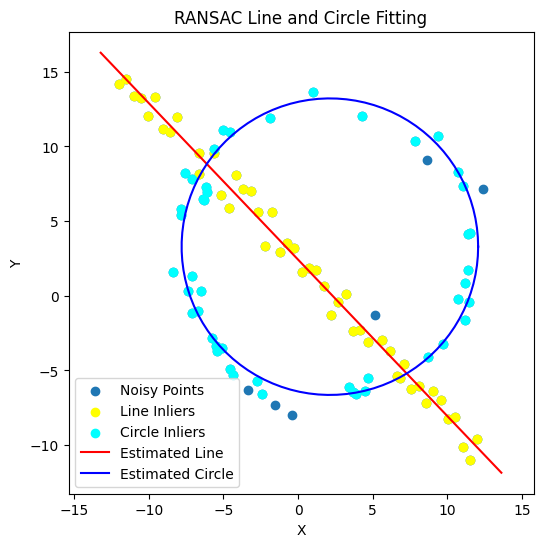

In [6]:


# Function to compute the distance from a point to a circle
def point_to_circle_distance(point, circle_params):
    xc, yc, r = circle_params
    x, y = point
    return np.abs(np.sqrt((x - xc)**2 + (y - yc)**2) - r)

# Function to fit a circle to three points
def fit_circle(points):
    x1, y1 = points[0]
    x2, y2 = points[1]
    x3, y3 = points[2]
    
    A = np.array([
        [x1, y1, 1],
        [x2, y2, 1],
        [x3, y3, 1]
    ])
    
    B = np.array([
        [x1**2 + y1**2],
        [x2**2 + y2**2],
        [x3**2 + y3**2]
    ])
    
    C = np.linalg.inv(A).dot(B)
    xc = 0.5 * C[0][0]
    yc = 0.5 * C[1][0]
    r = np.sqrt(C[2][0] + xc**2 + yc**2)
    
    return xc, yc, r

# RANSAC algorithm for circle fitting
def ransac_circle_fitting(X, num_iterations=1000, distance_threshold=1.0, consensus_threshold=50):
    best_inliers = []
    best_circle_params = None

    for _ in range(num_iterations):
        # Randomly select three points
        sample_indices = np.random.choice(X.shape[0], 3, replace=False)
        sample_points = X[sample_indices]

        # Fit a circle to the sample points
        circle_params = fit_circle(sample_points)

        # Compute the number of inliers
        distances = np.array([point_to_circle_distance(point, circle_params) for point in X])
        inliers = distances < distance_threshold

        if np.sum(inliers) > np.sum(best_inliers):
            best_inliers = inliers
            best_circle_params = circle_params

        # Check if the number of inliers meets the consensus threshold
        if np.sum(inliers) > consensus_threshold:
            break

    return best_circle_params, best_inliers

# Apply RANSAC to estimate the line
line_params, inliers = ransac_line_fitting(X, num_iterations=1000, distance_threshold=1.0, consensus_threshold=50)

# Subtract the inliers of the best line
X_remnant = X[~inliers]

# Apply RANSAC to estimate the circle
circle_params, circle_inliers = ransac_circle_fitting(X_remnant, num_iterations=1000, distance_threshold=1.0, consensus_threshold=50)

# Plot the points, estimated line, and estimated circle
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(X[:, 0], X[:, 1], label='Noisy Points')
ax.scatter(X[inliers, 0], X[inliers, 1], color='yellow', label='Line Inliers')
ax.scatter(X_remnant[circle_inliers, 0], X_remnant[circle_inliers, 1], color='cyan', label='Circle Inliers')

# Plot the estimated line
a, b, d = line_params
x_vals = np.array(ax.get_xlim())
y_vals = -(a * x_vals + d) / b
ax.plot(x_vals, y_vals, color='red', label='Estimated Line')

# Plot the estimated circle
xc, yc, r = circle_params
theta = np.linspace(0, 2 * np.pi, 100)
x_circle_fit = xc + r * np.cos(theta)
y_circle_fit = yc + r * np.sin(theta)
ax.plot(x_circle_fit, y_circle_fit, color='blue', label='Estimated Circle')

ax.set_title('RANSAC Line and Circle Fitting')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.axis('equal')
ax.legend()
plt.show()